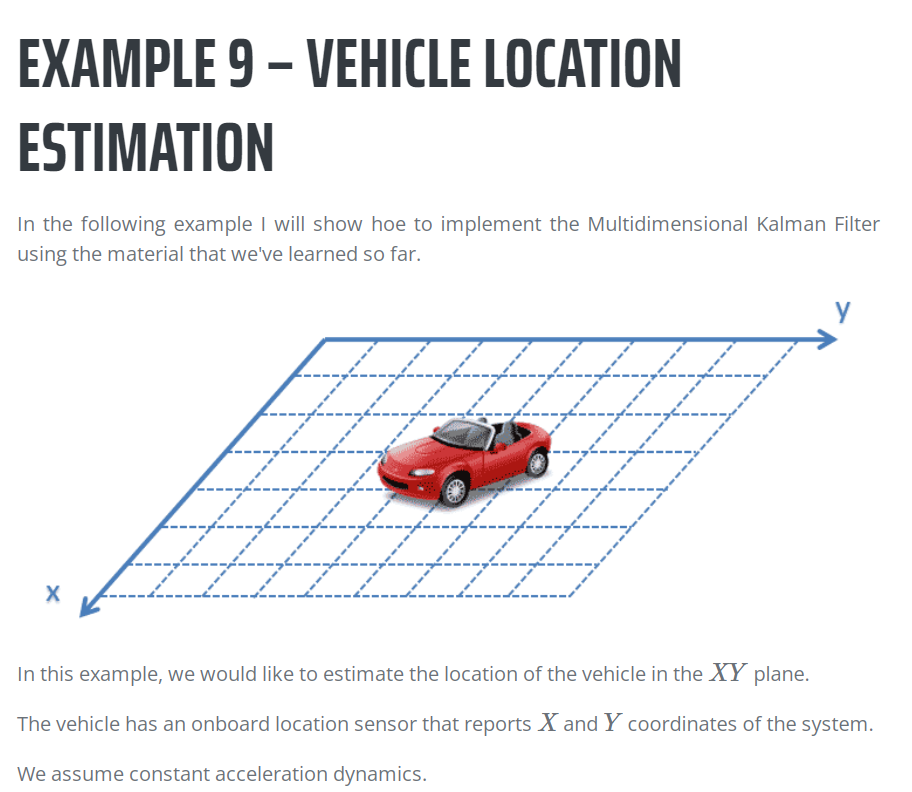

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from numpy.linalg import inv
from skimage.metrics import structural_similarity

np.random.seed(0)

In [7]:
measurements = np.array([
    [-393.66, 300.40],
    [-375.93, 301.78],
    [-351.04, 295.10],
    [-328.96, 305.19],
    [-299.35, 301.06],
    [-273.36, 302.05],
    [-245.89, 300.00],
    [-222.58, 303.57],
    [-198.03, 296.33],
    [-174.17, 297.65],
    [-146.32, 297.41],
    [-123.72, 299.61],
    [-103.47, 299.6],
    [-78.23, 302.39],
    [-52.63, 295.04],
    [-23.34, 300.09],
    [25.96,  294.72],
    [49.72,  298.61],
    [76.94,  294.64],
    [95.38,  284.88],
    [119.83, 272.82],
    [144.01, 264.93],
    [161.84, 251.46],
    [180.56, 241.27],
    [201.42, 222.98],
    [222.62, 203.73],
    [239.4 , 184.1 ],
    [252.51, 166.12],
    [266.26, 138.71],
    [271.75, 119.71],
    [277.4 , 100.41],
    [294.12, 79.76],
    [301.23, 50.62],
    [291.8, 32.99],
    [299.89, 2.14]
])

In [8]:
def kalman_filter(z_meas, x_esti, P):
    """Kalman Filter Algorithm."""
    # (1) Prediction.
    x_pred = A @ x_esti
    P_pred = A @ P @ A.T + Q

    # (2) Kalman Gain.
    K = P_pred @ H.T @ inv(H @ P_pred @ H.T + R)

    # (3) Estimation.
    x_esti = x_pred + K @ (z_meas - H @ x_pred)

    # (4) Error Covariance.
    P = P_pred - K @ H @ P_pred

    return x_esti, P

In [9]:
dt = 1
n_samples = 35

In [14]:
# Initialization for system model.
# Matrix: A, H, Q, R, P_0
# Vector: x_0
A = np.array([[1, dt, 0.5**dt, 0, 0, 0],
              [0,  1, dt,  0, 0, 0],
              [0, 0, 1, 0, 0, 0],
              [0, 0, 0, 1, dt, 0.5**dt],
              [0, 0, 0, 0 , 1, dt],
              [0, 0, 0, 0, 0, 1]])
H = np.array([[1, 0, 0, 0, 0, 0],
              [0, 0, 0, 1, 0, 0]])
Q = np.array([
    [0.25, 0.5, 0.5, 0, 0, 0], 
    [0.5, 1, 1, 0, 0, 0], 
    [0.5, 1, 1, 0, 0, 0], 
    [0, 0, 0, 0.25, 0.5, 0.5],
    [0, 0, 0, 0.5, 1, 1],
    [0, 0, 0, 0.5, 1, 1]
])
R = np.array([[9,  0],
              [0, 9]])

# Initialization for estimation.
x_0 = np.array([0, 0, 0, 0, 0, 0])  # (x-pos, x-vel, y-pos, y-vel) by definition in book.
P_0 = 500 * np.eye(6)

In [15]:
xpos_meas_save = np.zeros(n_samples)
ypos_meas_save = np.zeros(n_samples)
xpos_esti_save = np.zeros(n_samples)
ypos_esti_save = np.zeros(n_samples)

In [27]:
x_esti, P = None, None
for i in range(n_samples):
    z_meas = measurements[i]
    if i == 0:
        x_esti, P = x_0, P_0
    else:
        x_esti, P = kalman_filter(z_meas, x_esti, P)

    xpos_meas_save[i] = z_meas[0]
    ypos_meas_save[i] = z_meas[1]
    xpos_esti_save[i] = x_esti[0]
    ypos_esti_save[i] = x_esti[3]  #속도

Text(0, 0.5, 'Y-pos. [m]')

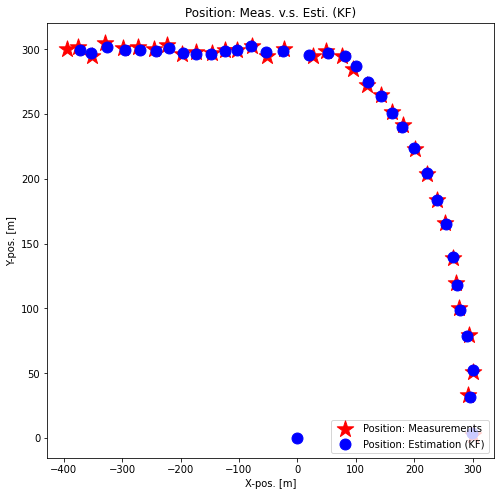

In [30]:
fig = plt.figure(figsize=(8, 8))
# plt.gca().invert_yaxis()
plt.scatter(xpos_meas_save, ypos_meas_save, s=300, c="r", marker='*', label='Position: Measurements')
plt.scatter(xpos_esti_save, ypos_esti_save, s=120, c="b", marker='o', label='Position: Estimation (KF)')
plt.legend(loc='lower right')
plt.title('Position: Meas. v.s. Esti. (KF)')
plt.xlabel('X-pos. [m]')
plt.ylabel('Y-pos. [m]')
# plt.xlim((-10, 350))
# plt.ylim((250, -10))